In [1]:
import pandas as pd

# Base: Survival data
data_surv = pd.read_csv(filepath_or_buffer='./data/00-TCGA-CDR.csv', encoding='utf-8')

# Extract tumor type in type
tumor_types = data_surv['type'].astype('category').cat.categories.tolist()

# Extract matched tumor type datasets
data_tumor = data_surv.loc[data_surv['type'] == tumor_types[1]]

# --------

# Feature data 01
f01_cnv = pd.read_csv(filepath_or_buffer='./data/01-CNV burden scores - seg_based_scores.tsv', sep='\\t', encoding='utf-8')

# Remove last three characters in Sample column
f01_cnv['Sample'] = f01_cnv['Sample'].str[:-3]

# Extract feature rows by survival bcr_patient_barcode and remain main-feature
f01_cnv_bytype = f01_cnv[f01_cnv['Sample'].isin(data_tumor['bcr_patient_barcode'])]
f01_cnv_bytype.rename(columns={'Sample':'bcr_patient_barcode'}, inplace=True)
f01_cnv_mfeature = f01_cnv_bytype.drop(columns=['n_segs', 'n_extrema'])

# ---------

# Preprocessing
# Common elements between survival - feature
common_elements = list(set(data_tumor['bcr_patient_barcode']).intersection(f01_cnv_mfeature['bcr_patient_barcode']))

# Extract common elements from both dataframes
data_tumor_common = data_tumor[data_tumor['bcr_patient_barcode'].isin(common_elements)]

# Concat two dataframes by bcr value
data_merged = pd.merge(data_tumor_common, f01_cnv_mfeature, on='bcr_patient_barcode')

data_cindex = data_merged.loc[:, ['bcr_patient_barcode', 'OS.time', 'OS', 'frac_altered']]

data_cindex.fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5108\2293985390.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  f01_cnv = pd.read_csv(filepath_or_buffer='./data/01-CNV burden scores - seg_based_scores.tsv', sep='\\t', encoding='utf-8')
C:\Users\user\AppData\Local\Temp\ipykernel_5108\2293985390.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f01_cnv_bytype.rename(columns={'Sample':'bcr_patient_barcode'}, inplace=True)


In [ ]:
# Feature data 02
f02_loh = pd.read_csv(filepath_or_buffer='./data/02-Aneuploidy and LOG Scores - ABSOLUTE_scores.tsv', sep='\\t', encoding='utf-8')

# Remove last three characters in Sample column
f02_loh['Sample'] = f02_loh['Sample'].str[:-3]

# Extract feature rows by survival bcr_patient_barcode and remain main-feature
f02_loh_bytype = f02_loh[f02_loh['Sample'].isin(data_tumor['bcr_patient_barcode'])]
f02_loh_bytype.rename(columns={'Sample':'bcr_patient_barcode'}, inplace=True)
f02_loh_mfeature = f02_loh_bytype.loc[:, ['bcr_patient_barcode', 'LOH_frac_altered']]
f02_loh_mfeature.fillna(0, inplace=True)

# ---------

# Preprocessing
# Common elements between survival - feature
common_elements = list(set(data_tumor['bcr_patient_barcode']).intersection(f02_loh_mfeature['bcr_patient_barcode']))

# Extract common elements from both dataframes
data_tumor_common = data_tumor[data_tumor['bcr_patient_barcode'].isin(common_elements)]

# Concat two dataframes by bcr value
data_cindex = pd.merge(data_cindex, f02_loh_mfeature, on='bcr_patient_barcode')

C:\Users\user\AppData\Local\Temp\ipykernel_5108\4032591152.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  f02_loh = pd.read_csv(filepath_or_buffer='./data/02-Aneuploidy and LOG Scores - ABSOLUTE_scores.tsv', sep='\\t', encoding='utf-8')
C:\Users\user\AppData\Local\Temp\ipykernel_5108\4032591152.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f02_loh_bytype.rename(columns={'Sample':'bcr_patient_barcode'}, inplace=True)


In [ ]:
# Feature data 03: purity
# Feature data 04: ploidy
f34_puriploi = pd.read_csv(filepath_or_buffer='./data/03+04-ABSOLUTE ploidy file - TCGA_mastercalls.abs_tables_JSedit.fixed.txt', sep='\\t', usecols=['array', 'purity', 'ploidy'], encoding='utf-8')

# Remove last three characters in Sample column
f34_puriploi['array'] = f34_puriploi['array'].str[:-3]

# Extract feature rows by survival bcr_patient_barcode and remain main-feature
f34_puriploi_bytype = f34_puriploi[f34_puriploi['array'].isin(data_tumor['bcr_patient_barcode'])]
f34_puriploi_bytype.rename(columns={'array':'bcr_patient_barcode'}, inplace=True)
f34_puriploi_mfeature = f34_puriploi_bytype.loc[:, ['bcr_patient_barcode', 'purity', 'ploidy']]
f34_puriploi_mfeature.fillna(0, inplace=True)

# ---------
# Preprocessing
# Check common elements between survival - feature
common_elements = list(set(data_tumor['bcr_patient_barcode']).intersection(f34_puriploi_mfeature['bcr_patient_barcode']))

# Extract common elements from both dataframes
data_tumor_common = data_tumor[data_tumor['bcr_patient_barcode'].isin(common_elements)]

# Concat two dataframes by bcr value
data_cindex = pd.merge(data_cindex, f34_puriploi_mfeature, on='bcr_patient_barcode')

C:\Users\user\AppData\Local\Temp\ipykernel_5108\174035145.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  f34_puriploi = pd.read_csv(filepath_or_buffer='./data/03+04-ABSOLUTE ploidy file - TCGA_mastercalls.abs_tables_JSedit.fixed.txt', sep='\\t', usecols=['array', 'purity', 'ploidy'], encoding='utf-8')


In [16]:
# Return Concordance_index
from lifelines.utils import concordance_index

# Compute the concordance index
# event_times: a length-n iterable of observed time
# event_observed: a length-n iterable censoring flags, 1 if observed, 0 if not or censored
# predicted_scores: a length-n iterable, these could be survival times or hazards

# concordance_index must have same shape
c_index = concordance_index(
    event_times=data_cindex['OS.time'],
    event_observed=data_cindex['OS'],
    predicted_scores=-data_cindex['LOH_frac_altered'])

c_index

0.5412796576292708

In [ ]:
# feature 마다 한번에 묶는것 비추
# feature - survival 사이에 공통 데이터 갯수 차이가 조금 있음.
# 따로 해서, c-index 구해야함.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


<lifelines.CoxPHFitter: fitted with 402 total observations, 226 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 402
number of events observed = 176
   partial log-likelihood = -937.53
         time fit was run = 2023-12-07 07:30:50 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
frac_altered      -0.39       0.68       0.41            -1.20             0.42                 0.30                 1.52
LOH_frac_altered   0.87       2.40       0.82            -0.73             2.47                 0.48                11.87
purity            -0.30       0.74       0.40            -1.08             0.47                 0.34                 1.60
ploidy             0.09       1.09       0.10            -0.11             0.28                 0.89                 1.33

                   cmp to     z    p   -log2(p)
covariate                                      
frac_altered         0.00 -0.95 0.34       1.55
LOH_frac_altered     0.00  1.07 0.28       1.81
purity               0.00 -0.76 0.44       1.17
ploidy               0.00  0.85 0.40       1.33
---
Concordance = 0.56
Partial AIC = 1883.05
log-likelihood ratio test = 3.95 on 4 df
-log2(p) of ll-ratio test = 1.28

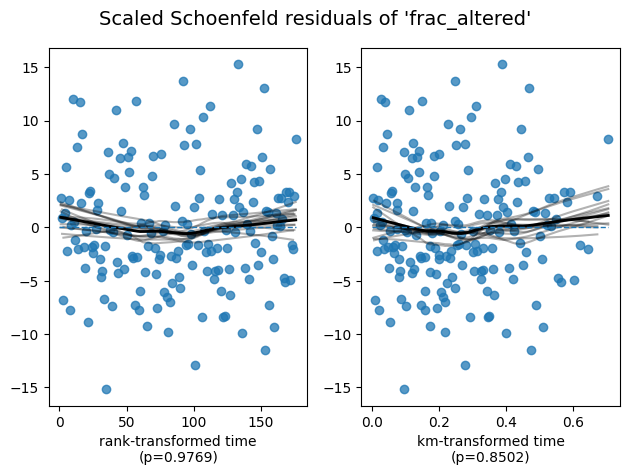

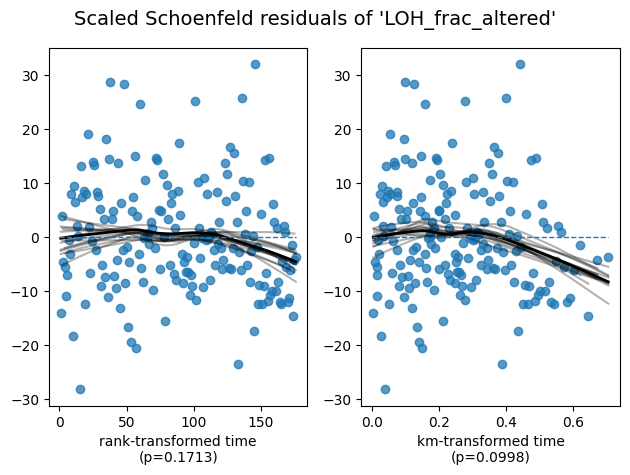

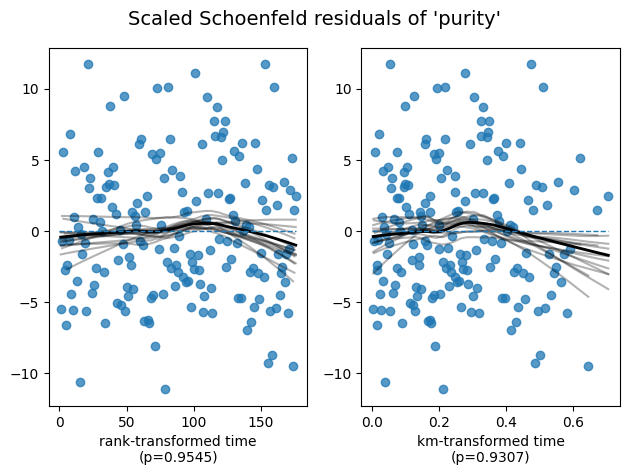

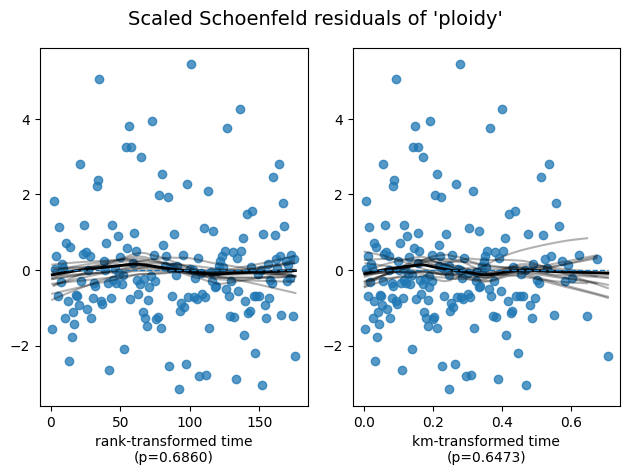

In [25]:
# predict_partial_hazard model
from lifelines.utils import concordance_index
from lifelines import CoxPHFitter

# numeric data
numeric_list = data_cindex.select_dtypes(include=[int, float]).columns.tolist()
data_cindex_numeric = data_cindex.loc[:, numeric_list]

#C-index
# Survival Analysis에서 가장 많이 사용하는 정확도 지표입니다. 대상의 정확한 생존 시간을 평가하지 않고,
# 대신 여러 대상의 생존 시간(또는 위험)을 상대적으로 비교합니다. 즉, 사망 순서를 잘 예측하는지 판단합니다.

cph = CoxPHFitter().fit(data_cindex_numeric, duration_col='OS.time', event_col='OS')
c_index = concordance_index(
    event_times=data_cindex['OS.time'],
    predicted_scores=-cph.predict_partial_hazard(data_cindex_numeric),
    event_observed=data_cindex['OS'])
cph.check_assumptions(data_cindex_numeric, p_value_threshold=0.05, show_plots=True)
cph.print_summary()

#adding a penalizer to the model,
#ex: CoxPHFitter(penalizer=0.1).fit(…) until the model converges.
#In the print_summary(), the coefficients that have high collinearity will have large (absolute) magnitude in the coefs column.

In [ ]:
# Feature data 05: Mutation Load
f05_muload = pd.read_csv(filepath_or_buffer='./data/05-Mutation Load - mutation-load_updated.txt', sep='\\t')

# Drop unuse column
f05_muload.drop(['Tumor_Sample_ID'], inplace=True)


# ----------

# Extract feature rows by survival bcr_patient_barcode and remain main-feature
f34_puriploi_bytype = f34_puriploi[f34_puriploi['array'].isin(data_tumor['bcr_patient_barcode'])]
f34_puriploi_bytype.rename(columns={'array':'bcr_patient_barcode'}, inplace=True)
f34_puriploi_mfeature = f34_puriploi_bytype.loc[:, ['bcr_patient_barcode', 'purity', 'ploidy']]
f34_puriploi_mfeature.fillna(0, inplace=True)

# ---------
# Preprocessing
# Check common elements between survival - feature
common_elements = list(set(data_tumor['bcr_patient_barcode']).intersection(f34_puriploi_mfeature['bcr_patient_barcode']))

# Extract common elements from both dataframes
data_tumor_common = data_tumor[data_tumor['bcr_patient_barcode'].isin(common_elements)]

# Concat two dataframes by bcr value
data_cindex = pd.merge(data_cindex, f34_puriploi_mfeature, on='bcr_patient_barcode')